In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('../../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../../DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

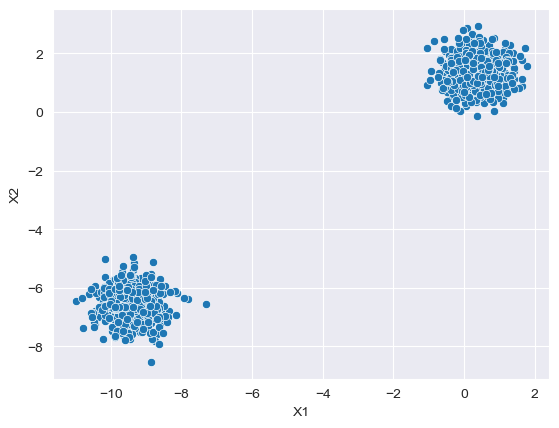

In [3]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

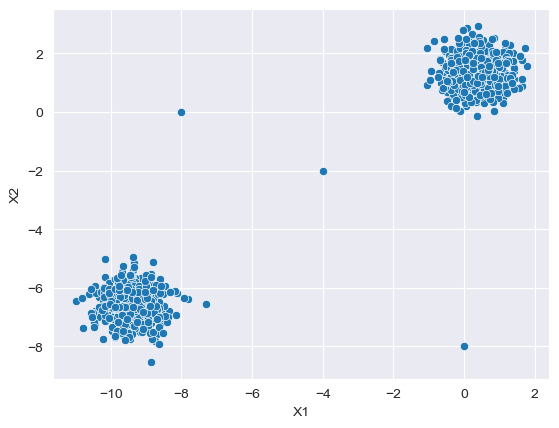

In [4]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [5]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN()

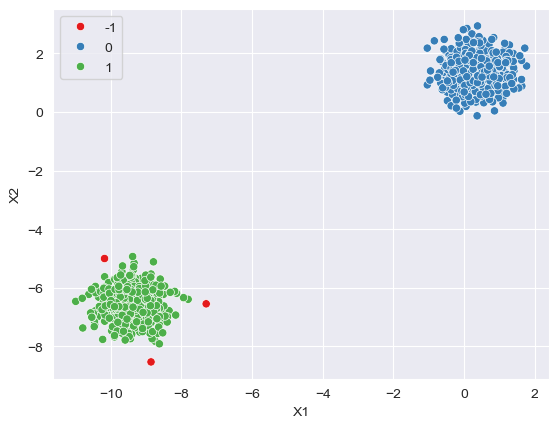

In [8]:
display_categories(dbscan, two_blobs)

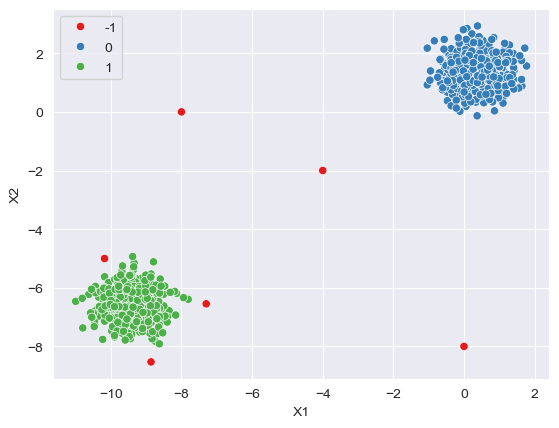

In [9]:
display_categories(dbscan, two_blobs_outliers)

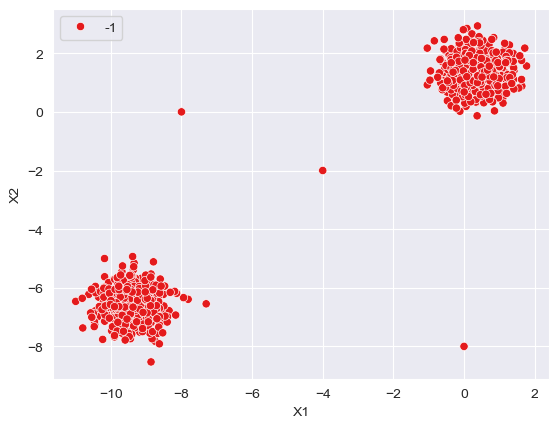

In [10]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

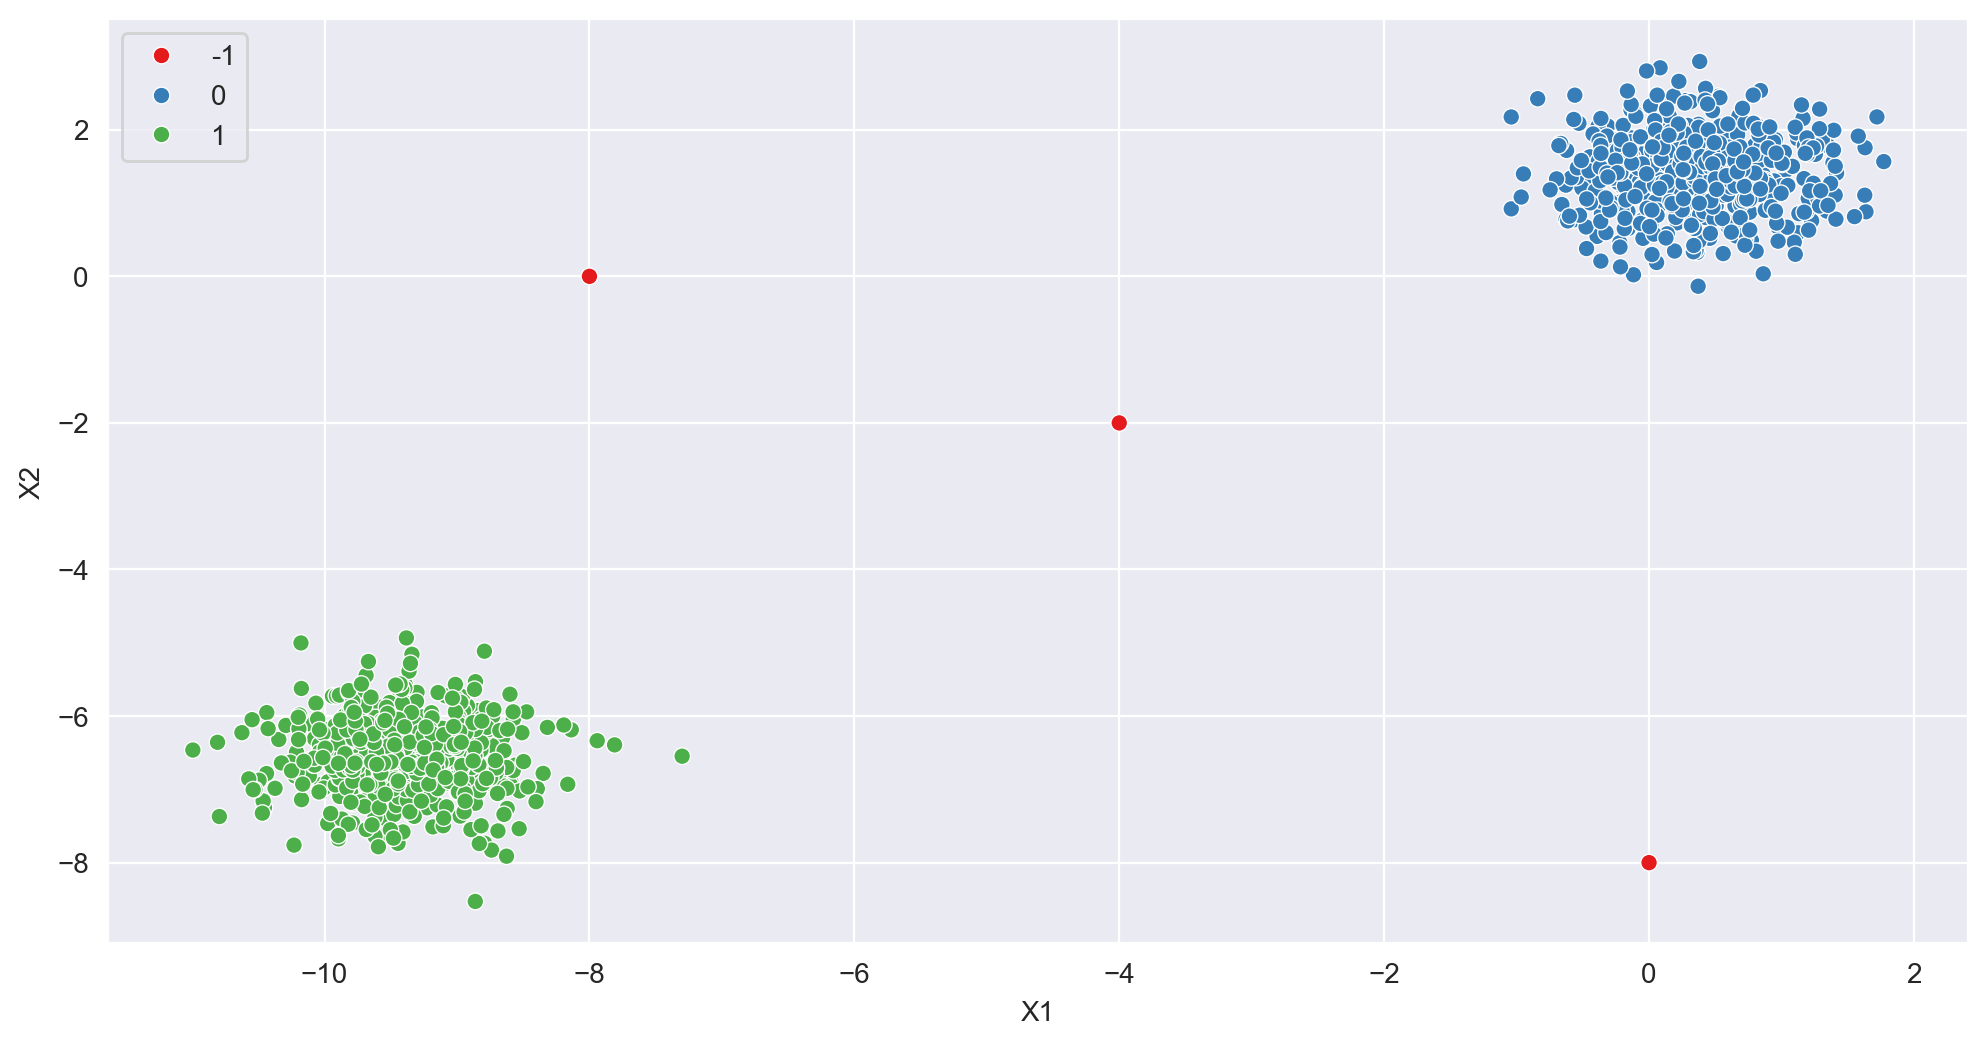

In [11]:
plt.figure(figsize=(12, 6), dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [12]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [13]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [16]:
pd.DataFrame(dbscan.labels_, columns=['Cluster']).value_counts()

Cluster
 0         500
 1         500
-1           3
Name: count, dtype: int64

In [18]:
100 * np.sum(dbscan.labels_ == -1)

300

In [25]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

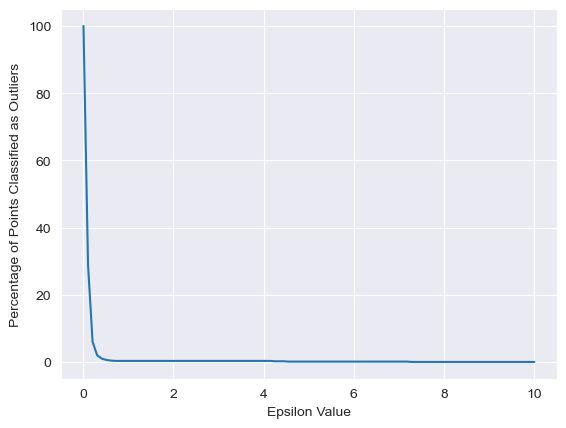

In [26]:
sns.lineplot(x=np.linspace(0.01, 10, 100), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

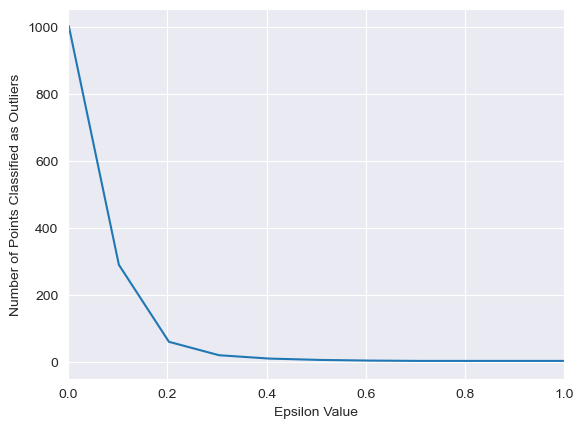

In [28]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

In [31]:
pd.DataFrame({
    'Epsilon': np.linspace(0.001, 10, 100),
    'Outlier Percentage': outlier_percent,
    'Number of Outliers': number_of_outliers
})

,Epsilon,Outlier Percentage,Number of Outliers
0,0.001,100.000000,1003
1,0.102,28.913260,290
2,0.203,5.982054,60
3,0.304,1.994018,20
4,0.405,0.997009,10
...,...,...,...
95,9.596,0.000000,0
96,9.697,0.000000,0
97,9.798,0.000000,0
98,9.899,0.000000,0


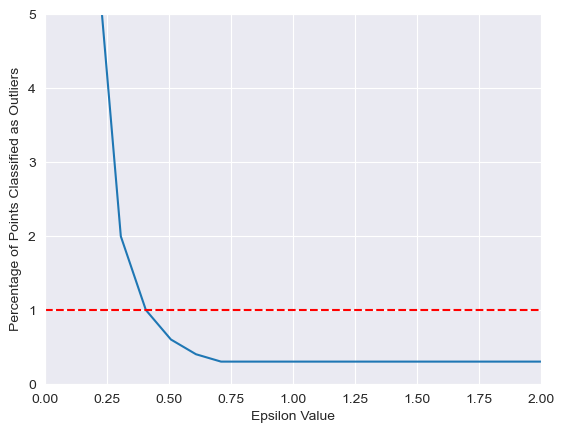

In [34]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

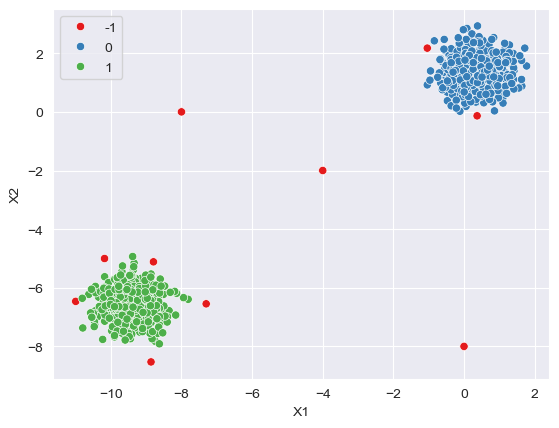

In [35]:
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan, two_blobs_outliers)

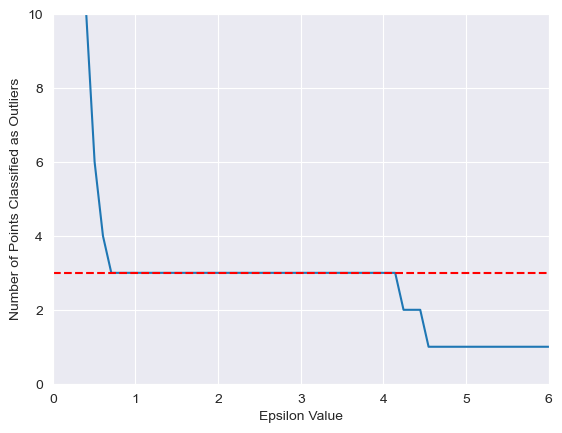

In [38]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

plt.ylim(0, 10)
plt.xlim(0, 6)
plt.hlines(y=3, xmin=0, xmax=10, colors='red', ls='--')

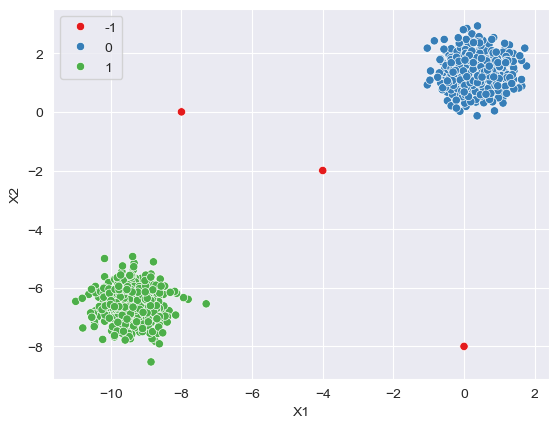

In [39]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan, two_blobs_outliers)

In [41]:
outlier_percent = []

for n in np.arange(1, 100):

    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

In [48]:
pd.DataFrame({
    'Min Samples': np.arange(1, 100),
    'Outlier Percentage': outlier_percent,
})

,Min Samples,Outlier Percentage
0,1,0.000000
1,2,0.598205
2,3,0.598205
3,4,0.598205
4,5,0.598205
...,...,...
94,95,8.474576
95,96,8.973081
96,97,9.072782
97,98,9.471585


Text(0.5, 0, 'Minimum Number of Samples')

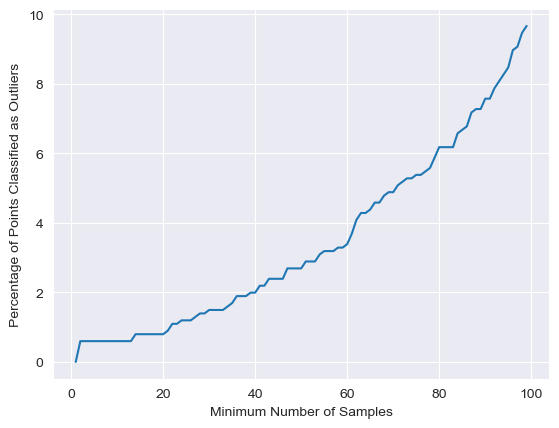

In [49]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

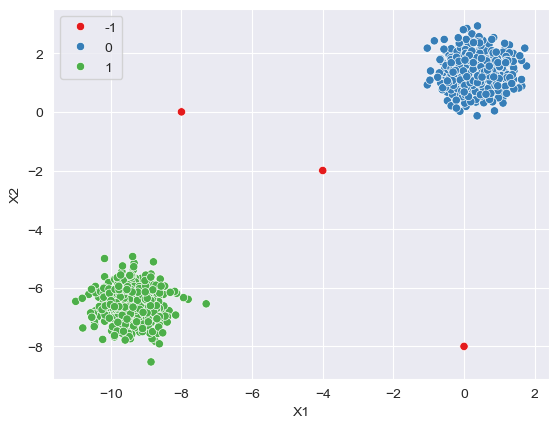

In [65]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75, min_samples=9 * num_dim)
display_categories(dbscan, two_blobs_outliers)

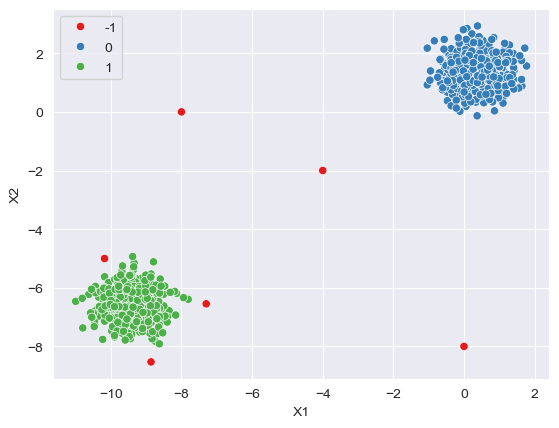

In [68]:
dbscan = DBSCAN(min_samples=2)
display_categories(dbscan, two_blobs_outliers)

In [71]:
np.sum(dbscan.labels_ == -1)

6

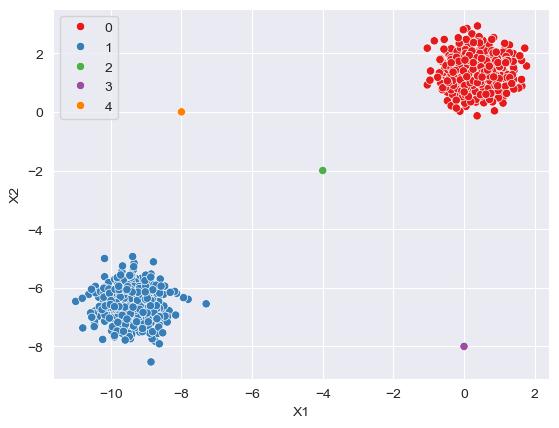

In [76]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)